In [0]:
!pip install tensorflow==2.0

     |████████████████████████████████| 86.3MB 1.4MB/s 
     |████████████████████████████████| 450kB 26.7MB/s 
     |████████████████████████████████| 3.8MB 29.4MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
print("Tensorflow Version: ", tf.__version__)

Tensorflow Version:  2.0.0


In [0]:
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to take values between 0 to 1
# TODO normalize between -1 to 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape the the image to become a vector
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [0]:
# set the size for the encoding dimension
encoding_dim_size = 32

# get an input Placeholder, the input will flow through here
input_image = tf.keras.layers.Input(shape=(784,)) # since we are using Dense layers only, the input should be vectorized

# "encoded" is the encoded representation of the input
# very simple, single layer encoder
# TODO add layers, change to CNN
encoded = tf.keras.layers.Dense(encoding_dim_size, activation='relu')(input_image)

# "decoded" is the lossy reconstruction of the input
# very simple, single layer encoder
# TODO add layers, change to CNN
# TODO try different activations like tanh
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = tf.keras.models.Model(input_image, decoded)

In [0]:
# Let's also make separate Encoder and Decoder Models

# this model maps an input to its encoded representation
encoder = tf.keras.models.Model(input_image, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = tf.keras.layers.Input(shape=(encoding_dim_size,))
# retrieve the last layer of the autoencoder model
# this is to share the same weights
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = tf.keras.models.Model(encoded_input, decoder_layer(encoded_input))

In [0]:
# Let's train the model to encode the MNIST handwritten digits

# Loss function would be per pixel binary crossentropy
# TODO try mse, mae
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# train for a bit
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2753 - val_loss: 0.1907
Epoch 2/50
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1715 - val_loss: 0.1534
Epoch 3/50
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1443 - val_loss: 0.1343
Epoch 4/50
 5120/60000 [=>............................] - ETA: 3s - loss: 0.1345

KeyboardInterrupt: ignored

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

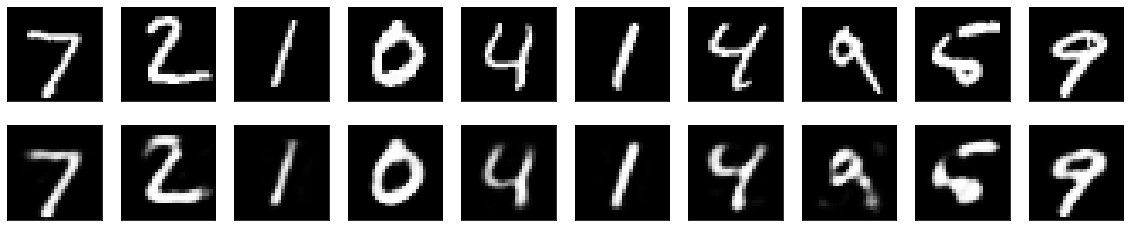

In [0]:
# let's display some numbers
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

What happens if we take an encoded representation and changed some values?
Let's try taking one of the values from our encoded representation and play with it to see what happens.

In [0]:
# this is the current value of the encoded vector
encoded_imgs[1]

array([ 6.228219  ,  6.4354644 ,  5.097592  , 12.046616  ,  0.44407332,
       17.080236  ,  0.7725378 ,  9.733774  ,  5.830577  ,  9.175587  ,
        3.7199345 , 13.099756  ,  0.44273138,  4.877685  ,  9.676138  ,
        7.831656  ,  6.246729  , 21.162567  ,  7.15691   ,  7.321661  ,
        9.829387  ,  0.        , 14.7061205 ,  8.084498  ,  8.04687   ,
        7.9814153 ,  9.821092  ,  9.175954  ,  5.2934766 ,  1.8684144 ,
        7.864293  , 13.213617  ], dtype=float32)

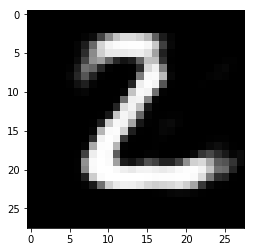

In [0]:
# this is what it produces
image = decoder.predict(encoded_imgs[1][None,...])
plt.imshow(image.reshape(28,28))

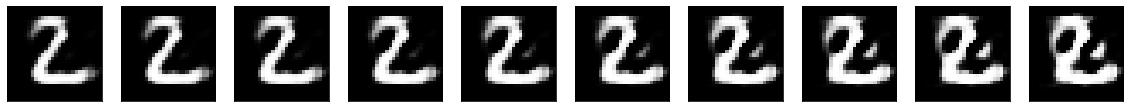

In [0]:
# let's try to change one of the values in the vector
new_encoded = encoded_imgs[1].copy()
dim_to_change = 8

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    new_encoded[dim_to_change] += (-n + 8.5)
    image = decoder.predict(new_encoded[None,...])
    plt.imshow(image.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

We can see how the digit changes as we change the value of one the dimensions of the encoded vector

We can make many changes to this model:
1. We can make it more complex by adding layers or by using convolutional layers
2. We can change the loss function to MSE or MAE loss
3. We can change the final activation function to tanh instead of sigmoid
4. We can add sparsity constraints to the encoded vector to make it encode actual features

To pit these against each other we can use PSNR or SSIM as the metrics for comparison.